## Black Friday Analysis

<b>Initializing Packages and Importing Data</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Working with data**

In [2]:
train=pd.read_csv("Downloads/blackfriday/train.csv")
test=pd.read_csv("Downloads/blackfriday/test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.shape

(550068, 12)

In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
def display_all(df):   
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
display_all(train.tail().T)

,550063,550064,550065,550066,550067
User_ID,1006033,1006035,1006036,1006038,1006039
Product_ID,P00372445,P00375436,P00375436,P00375436,P00371644
Gender,M,F,F,F,F
Age,51-55,26-35,26-35,55+,46-50
Occupation,13,1,15,1,0
City_Category,B,C,B,C,B
Stay_In_Current_City_Years,1,3,4+,2,4+
Marital_Status,1,0,1,0,1
Product_Category_1,20,20,20,20,20
Product_Category_2,NaN,NaN,NaN,NaN,NaN


In [8]:
numerical_feats = train.dtypes[train.dtypes != "object"].index  
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [9]:
print(train[numerical_feats].columns)
print(train[categorical_feats].columns)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [10]:
train.isna().any() #check whether any null value exist

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [11]:
Numerical = [f for f in train.columns if train.dtypes[f] != 'object']
Categorical = [f for f in train.columns if train.dtypes[f] == 'object']

In [12]:
for col in Numerical:
    print('{:20}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

User_ID              Skewness: 00.00     Kurtosis: -01.20
Occupation           Skewness: 00.40     Kurtosis: -01.22
Marital_Status       Skewness: 00.37     Kurtosis: -01.86
Product_Category_1   Skewness: 01.03     Kurtosis: 001.23
Product_Category_2   Skewness: -0.16     Kurtosis: -01.43
Product_Category_3   Skewness: -0.77     Kurtosis: -00.81
Purchase             Skewness: 00.60     Kurtosis: -00.34


 ### Exploratory Data Analysis (EDA)
 
 **Univariate Distribution**

Skew is: 0.6001400037087128
Kurtosis: -0.338378


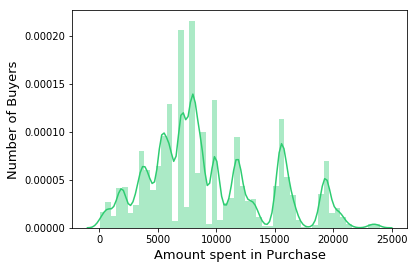

In [13]:
import seaborn as sns
sns.distplot(train['Purchase'],color="#2ecc71");
plt.xlabel("Amount spent in Purchase",fontsize=13)
plt.ylabel("Number of Buyers",fontsize=13)
#skewness and kurtosis
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

In [14]:
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


In [15]:
categorical_feats = train.select_dtypes(include = np.object)
categorical_feats.dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

**Distribution of the Occupation variable**

In [16]:
train.Occupation.value_counts()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

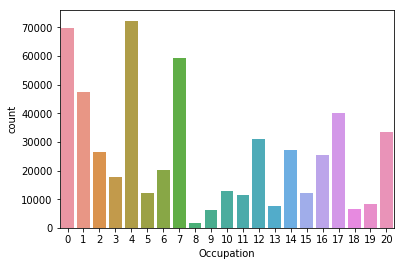

In [17]:
sns.countplot(train.Occupation)

**Distribution of the Marital_Status variable**

In [18]:
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

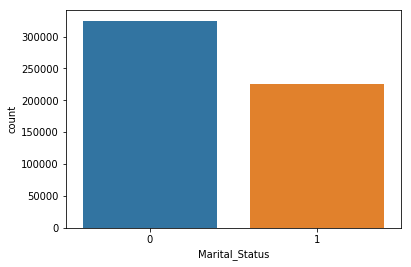

In [19]:
sns.countplot(train.Marital_Status)

**Distribution of the Product variable**

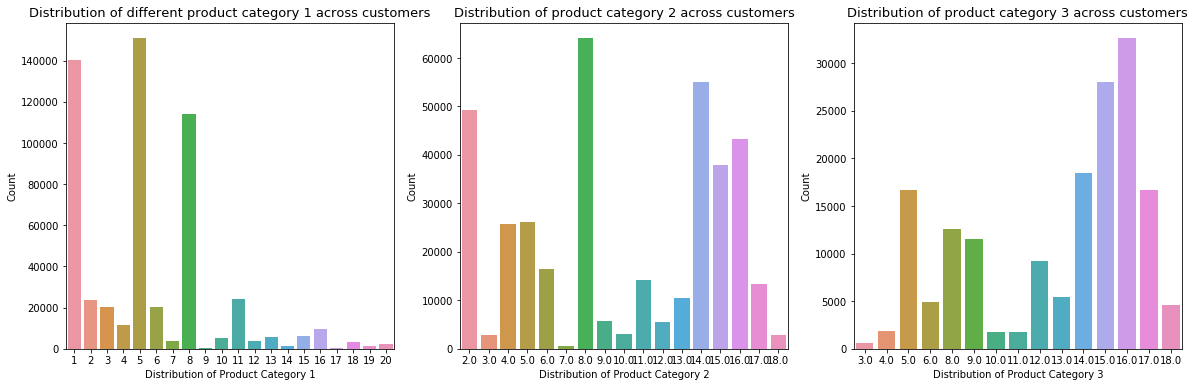

In [20]:
plt.rcParams['figure.figsize'] = (20, 6)

plt.subplot(131)
sns.countplot(train.Product_Category_1)
plt.title('Distribution of different product category 1 across customers', fontsize = 13)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(train.Product_Category_2)
plt.title('Distribution of product category 2 across customers', fontsize = 13)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(train.Product_Category_3)
plt.title('Distribution of product category 3 across customers', fontsize = 13)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')
plt.show()

In [21]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes #checking the numerical features in dataset

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

**Correlation between Numerical Predictors and Target variable**

In [22]:
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


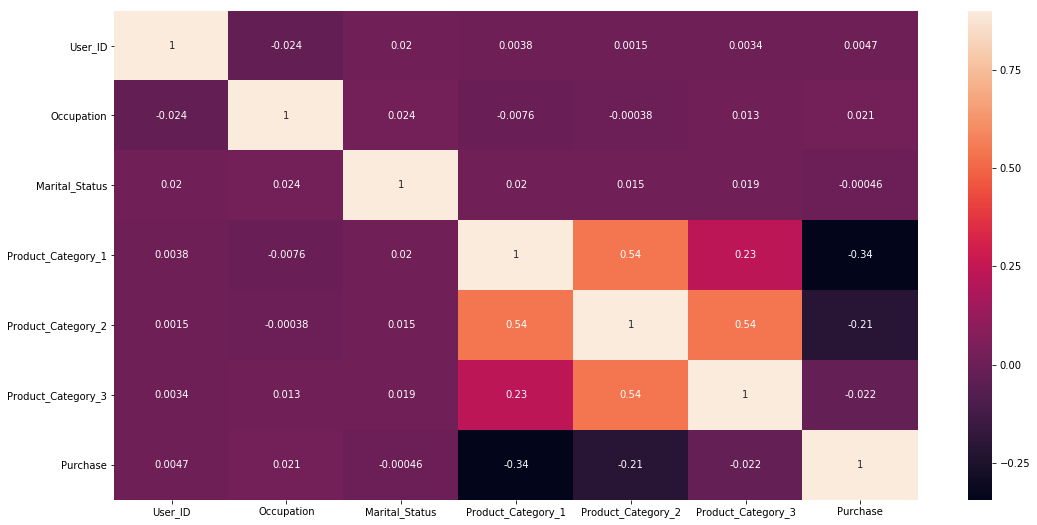

In [23]:
corr = train.corr()
f, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corr, vmax=.9, annot=True);

The key take aways from the above plot are the positive correlation coefficients of three features as a function of Purchase:

Occupation

Stay_In_Current_City_Years

Marital Status

Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

In [24]:
st=corr.unstack

In [25]:
st

<bound method DataFrame.unstack of                      User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583  

 **Categorical Variables**
 
 **Distribution of the variable Gender**

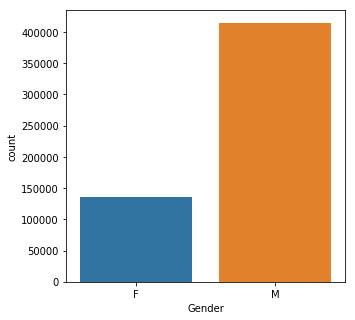

In [26]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(train.Gender)

**Distribution of the Age variable**

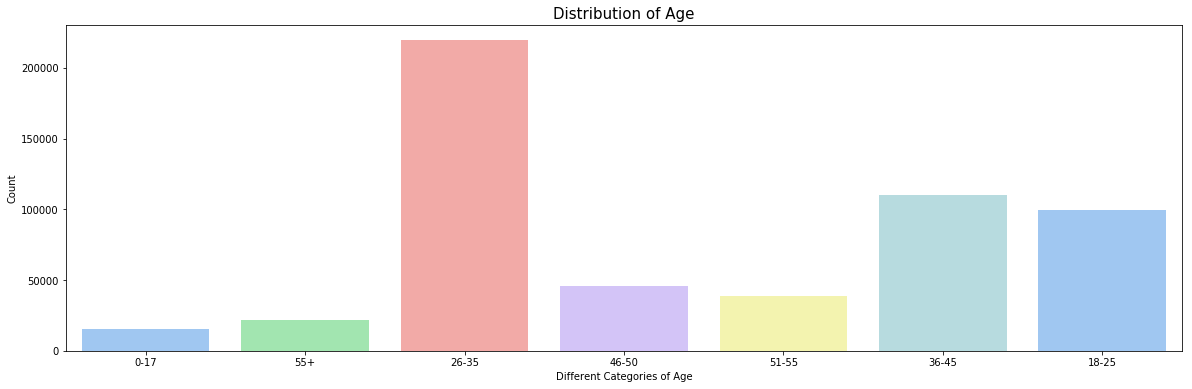

In [27]:
sns.countplot(train['Age'], palette = 'pastel')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Different Categories of Age',fontsize=10)
plt.ylabel('Count')
plt.show()

** Distribution of the variable City**

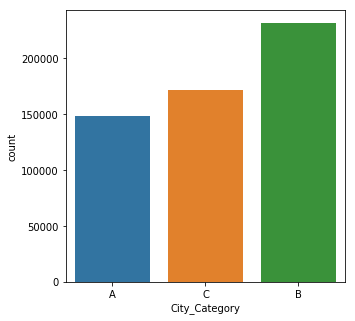

In [28]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(train.City_Category)

** Distribution of the variable Stay_In_Current_City_Years**

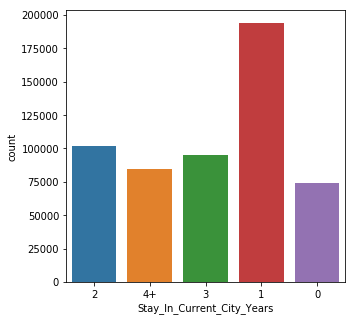

In [29]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(train.Stay_In_Current_City_Years)

<h3>Bivariate Distribution</h3>

**Numerical Variables**

**Occupation and Purchase Analysis**

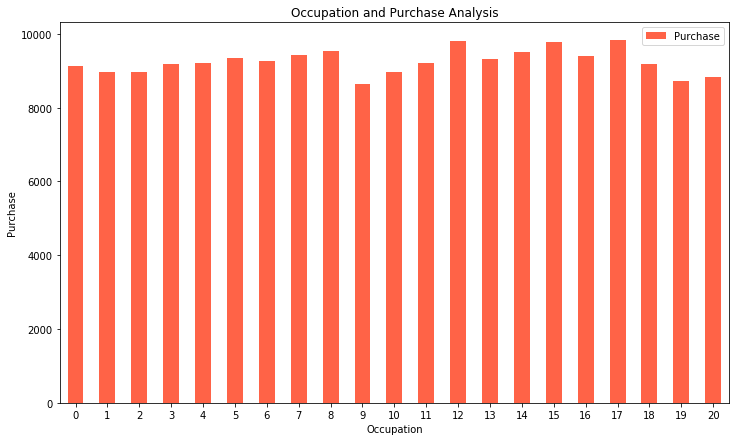

In [30]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='tomato',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

**Marital_Status and Purchase Analysis**

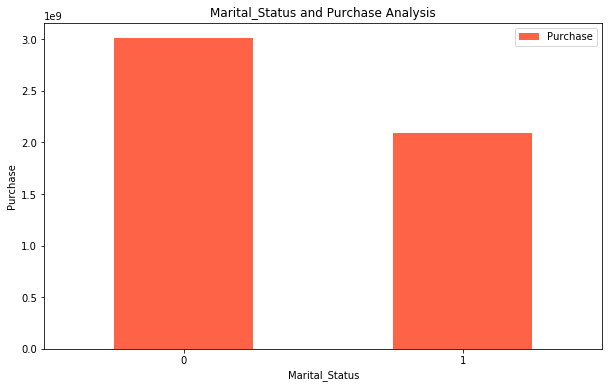

In [31]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.sum)

Marital_Status_pivot.plot(kind='bar', color='tomato',figsize=(10,6))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

**Product_Category_1 and Purchase Analysis**

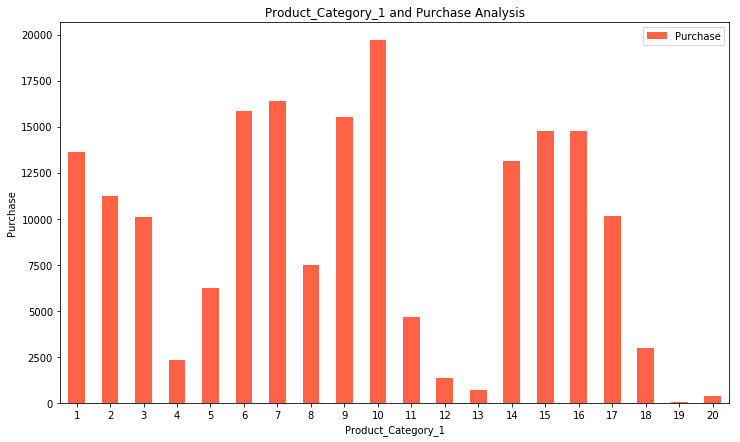

In [32]:
Product_Category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_Category_1_pivot.plot(kind='bar', color='tomato',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

**Product_Category_1 and Purchase Analysis with sum fun**

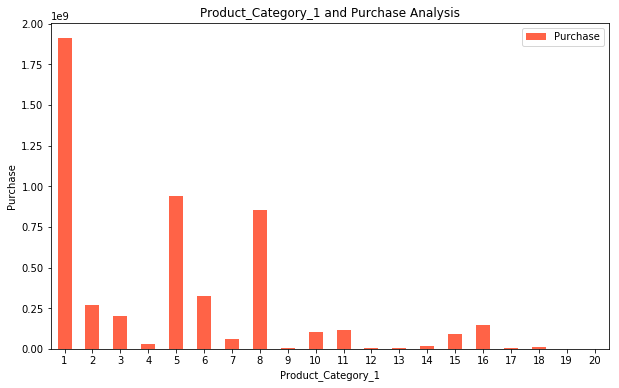

In [33]:
Product_Category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)

Product_Category_1_pivot.plot(kind='bar', color='tomato',figsize=(10,6))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Categorical Variables

**Gender and Purchase Analysis**

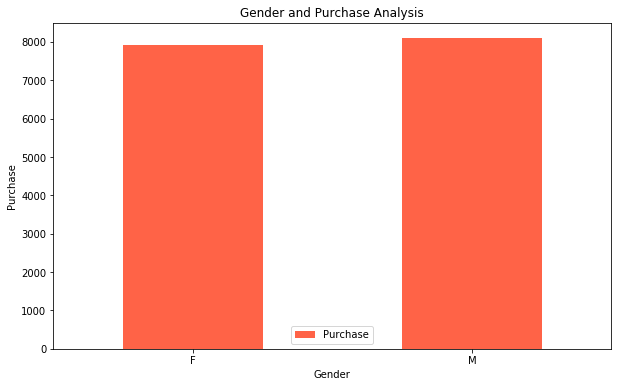

In [34]:
Gender_pivot = \
train.pivot_table(index='Gender', values="Purchase", aggfunc=np.median)

Gender_pivot.plot(kind='bar', color='tomato',figsize=(10,6))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [35]:
train['Gender'].max()

'M'

**Age and Purchase Analysis**

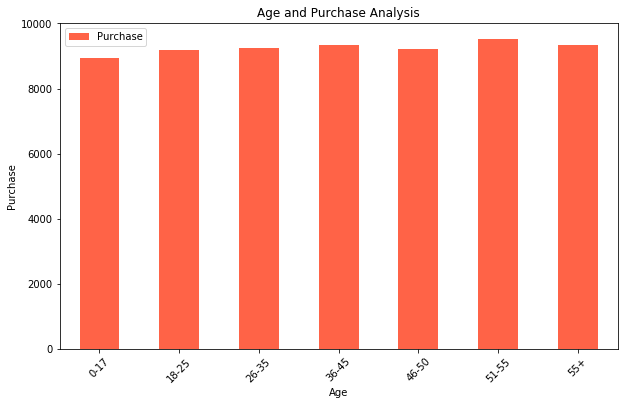

In [36]:
Age_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

Age_pivot.plot(kind='bar', color='tomato',figsize=(10,6))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing
We shall first address the issue of missing values from the data. Here we'll use the basic approach of filling NA.

In [37]:
# filling the missing values
train["Product_Category_2"]= \
train["Product_Category_2"].fillna(0).astype("float")

In [38]:
train.Product_Category_2.value_counts().sort_index()

0.0     173638
2.0      49217
3.0       2884
4.0      25677
5.0      26235
6.0      16466
7.0        626
8.0      64088
9.0       5693
10.0      3043
11.0     14134
12.0      5528
13.0     10531
14.0     55108
15.0     37855
16.0     43255
17.0     13320
18.0      2770
Name: Product_Category_2, dtype: int64

In [39]:
train["Product_Category_3"]= \
train["Product_Category_3"].fillna(0).astype("float")
train.Product_Category_3.value_counts().sort_index()

0.0     383247
3.0        613
4.0       1875
5.0      16658
6.0       4890
8.0      12562
9.0      11579
10.0      1726
11.0      1805
12.0      9246
13.0      5459
14.0     18428
15.0     28013
16.0     32636
17.0     16702
18.0      4629
Name: Product_Category_3, dtype: int64

In [40]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

**Frequency Analysis**

In [41]:
category_cols = train.select_dtypes(include=['object'])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = train[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00270942    1152
             ... 
P00203942       1
P00008942       1
P00066342       1
P00298842       1
P00022042       1
P00231642       1
P00336242       1
P00167342       1
P00314842       1
P00126742       1
P00164242       1
P00077542       1
P00238842       1
P00299042       1
P00106342       1
P00081342       1
P00104342       1
P00074842       1
P00234942       1
P00308042       1
P00364342       1
P00051742   

## Feature Engineering

**Converting gender to binary**

In [42]:
gender_dictionary = {'F':0, 'M':1}
train["Gender"] = train["Gender"].apply(lambda line: gender_dictionary[line])

train["Gender"].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

**Converting Age to numeric values**

In [43]:
# Giving Age Numerical values
age_dictionary = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
train["Age"] = train["Age"].apply(lambda line: age_dictionary[line])

train["Age"].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

** Converting city_category to binary**

In [44]:
city_dictionary={"A":0,"B":1,"C":2}
train["City_Category"] = train["City_Category"].apply(lambda line: city_dictionary[line])

train["City_Category"].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

**Converting Stay_In_Current_City_Years to binary**

In [45]:
#Import library:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
train['Stay_In_Current_City_Years'] = label.fit_transform(train['Stay_In_Current_City_Years'])
    
#Dummy Variables:
train = pd.get_dummies(train, columns=['Stay_In_Current_City_Years'])

train.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [46]:
User_ID = train['User_ID']
Product_ID = train['Product_ID']

train = train.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
train.shape

(550068, 14)

In [47]:
train.to_csv("Downloads/blackfriday/train_modified.csv",index=False)

In [48]:
train.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,0.0,0.0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,0,0,10,0,0,12,0.0,0.0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14.0,0.0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0.0,0.0,7969,0,0,0,0,1


In [49]:
train.shape

(550068, 14)

In [50]:
# splitting the data into dependent and independents sets

y = train['Purchase']

# now removing the purchase column from the dataset
train = train.drop(['Purchase'], axis = 1)

x = train

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 13)
Shape of y:  (550068,)


In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 13)
Shape of x_test:  (165021, 13)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modelling 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2925.132197101626
R2 Score: 0.6624921790439979
